In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

In [ ]:
df = pd.read_csv('../input/flavors_of_cacao.csv',na_values='\xa0')

let's check for some missing values first

In [ ]:
b = pd.DataFrame(df.isnull().sum(), columns= ['Number of missing values'])
b

In [ ]:
df.head()

In [ ]:
plt.figure(figsize=(8,6))
sns.distplot(df['Rating'],bins=5,color='brown')

The distribution of the ratings is somewhat skewed from normal. We see that there is a high number of  3 and 4 ratings. There are very few 1 and 5 ratings.

Extracted the Cocoa percentage and converted it into float for further analysis

In [ ]:
df['Cocoa % as num'] = df['Cocoa\nPercent'].apply(lambda x: x.split('%')[0])


In [ ]:
df['Cocoa % as num'] = df['Cocoa % as num'].astype(float)

In [ ]:
df.head()

In [ ]:
df=df.drop(columns=['Cocoa\nPercent'],axis=1)

In [ ]:
df.columns

In [ ]:
df.dtypes

Cocoa is a key ingredient of any chocolate. Now, lets look at the distribution of cocoa percentage.
As expected, we see that the distribution of cocoa percentage in chocolates is normally distributed with a majority of the chocolates having 70% of cocoa.

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(df['Cocoa % as num'],bins=20,color='Brown')

In [ ]:
df=df.drop(columns=["Bean\nType"], axis=1)

Let's have a look at the ratings by Review year, we would like to see if the review date has an effect on the Rating. Also, we would like to see if the outliers in the Rating. A boxplot would be very helpful in this case.

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
(df.isnull().sum())/df.shape[0]

In [ ]:
a=pd.crosstab(index=df['Company\nLocation'],columns="count")
type(a)
a["count"].sort_values(ascending=False)

U.S.A, France, Canada and  UK   has the higher number  company branches.

<b>Bean Type has  49.47% data is missing </b><br>
It is necessary to remove the column because missing type is MNAR(Missing Not at Random).

In [ ]:
df.head()

In [ ]:
df.dtypes

In [ ]:
df.isnull().sum()/(df.shape[0])*100

In [ ]:
a = df.groupby(['Company\nLocation'])['Rating'].mean()
a = a.sort_values(ascending=False)
b = df.groupby(['Company\nLocation'])['Rating'].median()
b = b.sort_values(ascending=False)
data_frame=[a,b]
data_frame=pd.concat(data_frame,axis=1)
data_frame=data_frame.rename(index=str,columns={"Rating":"mean","Rating":"median"})

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3,figsize=(12,15))
a = df.groupby(['Company\nLocation'])['Rating'].mean()
a = a.sort_values(ascending=False)

b = df.groupby(['Company\nLocation'])['Rating'].median()
b = b.sort_values(ascending=False)

a = pd.DataFrame(a)
b = pd.DataFrame(b)

Ratings_by_location = a.join(b, how='left',lsuffix='_mean', rsuffix='_median')
Ratings_by_location['Mean-Median'] = Ratings_by_location['Rating_mean']-Ratings_by_location['Rating_median']
Rating_difference = sns.barplot(x=Ratings_by_location.index,y=Ratings_by_location['Mean-Median'], ax = ax3)
Rating_difference.set_xticklabels(labels = Ratings_by_location.index, rotation =90)
Rating_difference.set_ylabel("Mean-Median of ratings")


#plt.figure(figsize=(12,6))
ratings_mean = sns.barplot(x=Ratings_by_location.index,y=Ratings_by_location['Rating_mean'],ax=ax1)
ratings_mean.set_xticklabels(labels = Ratings_by_location.index, rotation =90)
ratings_mean.set_ylabel("Mean of Ratings")


#plt.figure(figsize=(12,6))
ratings_median = sns.barplot(x=Ratings_by_location.index,y=Ratings_by_location['Rating_median'], ax = ax2)
ratings_median.set_xticklabels(labels = Ratings_by_location.index, rotation =90)
ratings_median.set_ylabel("Median of ratings")

plt.tight_layout()

Lets looks at the Cocoa percentage used in Chocolates in different countries. 
From the below chart, the distribution of cocoa varied from 40% to around 80% in our dataset. 

In [ ]:
plt.figure(figsize=(12,6))

c = df.groupby(['Company\nLocation'])['Cocoa % as num'].mean()
c = c.sort_values(ascending=False)

d = df.groupby(['Company\nLocation'])['Rating'].mean()
d = d.sort_values(ascending=False)

ratings = sns.barplot(x=c.index,y=c)
ratings.set_xticklabels(labels = c.index, rotation =90)
plt.show()

From above analysis we may say that Rating is associated with company location and cocoa percentage. Since the country which produces cocoa, has higher cocoa percentage in chocolates than the other countries so it is obvious that these countries produces chocolates which has hgher ratings.

In [ ]:
data=[c,d]
data_comarison_locat_rating=pd.concat(data,axis=1)
data_comarison_locat_rating

The Ratings might be possibly influenced by the bean type and broad bean type used in the production.
Since we have these features in our dataset, we can plot the effect these features have on our ratings.

From the below visualizations, we can see that the distribution of ratings is different based on bean type and broad bean type.

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(12,15))
f = df.groupby(['Broad Bean\nOrigin'])['Rating'].mean()
f = f.sort_values(ascending=False)
Rating_broadbean = sns.barplot(y=f.index,x=f,ax = ax2)
plt.tight_layout()

In [ ]:
df.head()

In [ ]:
df.dtypes

In [ ]:
date=pd.crosstab(index=df['Review\nDate'],columns="count")
type(a)
date["count"].sort_values(ascending=False)

<b>DBSCAN:(Density Based Saptial Clustering of applications with noise</b><br>
Features chosen
* Cocoa percentage, 
* Review date,
* Rating, 
* Broad bean origin, 
* Company location 
<br> included in the training data for our clustering model.

Density-based spatial clustering of applications with noise (DBSCAN) is a data clustering algorithm proposed by Martin Ester, Hans-Peter Kriegel, Jörg Sander and Xiaowei Xu in 1996. It is a density-based clustering algorithm: given a set of points in some space, it groups together points that are closely packed together (points with many nearby neighbors), marking as outliers points that lie alone in low-density regions (whose nearest neighbors are too far away). DBSCAN is one of the most common clustering algorithms and also most cited in scientific literature.

In 2014, the algorithm was awarded the test of time award (an award given to algorithms which have received substantial attention in theory and practice) at the leading data mining conference, KDD.

Source: Wikipedia


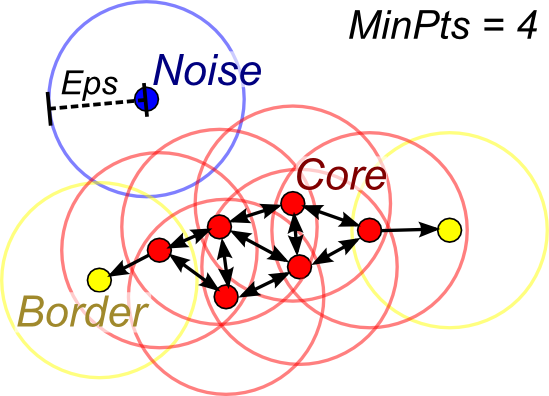


The above figure is taken from https://stats.stackexchange.com/questions/194734/dbscan-what-is-a-core-point

Blue observations are noise

Red observations are core points

Yellow ones are non core point aka edges of the cluster



In [ ]:
df1.ix[:,0]

In [ ]:
df1=df.drop(columns=['Specific Bean Origin\nor Bar Name',"REF"],axis=1)

In [ ]:
df1.columns

In [ ]:
df1=df1.reset_index(inplace=False)

In [ ]:
df1.columns

**One-Hot Encoding**: For non_numeric data

In [ ]:
#Dummification of categorical data
non_numerical_columns = ['Review\nDate','Broad Bean\nOrigin','Company\nLocation']
for i in non_numerical_columns:
    x1 = pd.get_dummies(df1[i])
    df1 = df1.join(x1,lsuffix='_l',rsuffix='_r')
    df1.drop(i,axis=1,inplace=True)

In [ ]:
df1.head()

In [ ]:
df2=df1.ix[:,2:]

In [ ]:
df2.head()

Standardizing the data is key for most of the clustering techniques to avoid a feature biasing the results of clustering

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [ ]:
df_num = StandardScaler().fit_transform(df2)

In [ ]:
df_num

In [ ]:
np.linspace(0.1,2,100)

In [ ]:
 fit = DBSCAN(eps=2.0, min_samples=10,n_jobs=-1).fit(df_num)

In [ ]:
#labels:Cluster labels for each point in the dataset given to fit(). Noisy samples are given the label -1.
np.sum(fit.labels_)

In [ ]:
core_samples_mask = np.zeros_like(fit.labels_, dtype=bool)
core_samples_mask

In [ ]:
core_samples_mask[fit.core_sample_indices_] = True
labels = fit.labels_
np.sum(labels)

In [ ]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

In [ ]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [ ]:
set(labels)

In [ ]:

A = []
B = []
C = []

for i in np.linspace(0.1,5,100):
    db = DBSCAN(eps=i, min_samples=10,n_jobs=-1).fit(df_num)

    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    
    sum = 0
    for t in labels:
        if t == -1: 
            sum = sum + 1
    C.append(sum)    
    A.append(i)
    B.append(int(n_clusters_))

labels are the label of the clusters.
If the label is -1, then the observation is an outlier/noise within our dataset.


db.core_sample_indices_   are the indices of the core points in the cluster, the indices that are excluded here are of outliers and the edges of the clusters

In [ ]:
results = pd.DataFrame([A,B,C]).T
results.columns = ['distance','Number of clusters','Number of outliers']
results.plot(x='distance',y='Number of clusters',figsize=(10,6))

Based on the above plot, I decided to go forward with a distance (epsilon) value of 1

In [ ]:
db = DBSCAN(eps=2.0, min_samples=10).fit(df_num)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

The number of clusters in our dataset is 12. Remember that the number of clusters does not include outliers/noise in the dataset.

In [ ]:
df = df.join(pd.DataFrame(labels))
df = df.rename(columns={0:'Cluster'})
df.head

-1 stands for outliers/Noise, we see that there are 93 outliers in our dataset. 

The number of observations in our clusters range from 20 to 283.

Let's look at some statistics within our clusters.

In [ ]:
df_clusters = df.groupby('Cluster')['Rating','Cocoa % as num']
df_clusters.describe()

In [ ]:
fig, (ax1,ax2) = plt.subplots(nrows = 2,figsize=(12,12))

plt.figure(figsize=(12,8))
plot1 = sns.boxplot(x=df['Cluster'],y=df['Rating'],data=df, ax = ax1)
plt.figure(figsize=(12,8))
plot2 = sns.boxplot(x=df['Cluster'],y=df['Cocoa % as num'],data=df, ax= ax2)

We can infer from the above plots that the rating as well as the Cocoa percentage is much different for our outliers from the remaining clusters within the dataset.

A high Cocoa percentage in a chocolate doesn't necessarily prompt higher ratings, looks like it actually worsens the ratings from our dataset.

The following code is actually taken from scikit learn for visualization of our clusters.

http://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py

In [ ]:
plt.figure(figsize=(16,12))
X = df_num

unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()